In [42]:
import pandas as pd
import numpy as np

In [55]:
def convert2Excel(filepath):
    test = pd.read_table(filepath,names=['UnixTime','Unknown0','Temperature','Unknown1','Unknown2'])
    test['Time'] = pd.to_datetime(test['UnixTime'], unit='s')- pd.Timedelta(weeks=66*52+12,days=-1)
    test['Rel.Time'] = test['Time']-test['Time'][0]
    test['Rel.Time [h]']=test['Rel.Time']/ np.timedelta64(1, 'h')
    test['Rel.Time [s]']=test['Rel.Time']/ np.timedelta64(1, 's')
    #test[['Time','Temperature','Rel.Time [s]','Rel.Time [h]']].to_excel(filepath[:-4]+".xlsx")
    return test[['Time','Temperature']]


Please, preload above module and library.  
Then, shift-enter the folowing command to convert the file into excel.

In [56]:
data0=convert2Excel('Temperature/data_0.dat')
data1=convert2Excel('Temperature/data_1.dat')
data2=convert2Excel('Temperature/data_2.dat')
data3=convert2Excel('Temperature/data_3.dat')

In [59]:
data1

,Time,Temperature
0,2020-11-15 05:11:01.144999981,25.262109
1,2020-11-15 05:11:06.146999836,25.357477
2,2020-11-15 05:11:11.147999763,25.392633
3,2020-11-15 05:11:16.146999836,25.323541
4,2020-11-15 05:11:21.146999836,25.487939
...,...,...
18074,2020-11-16 06:17:11.146999836,24.788934
18075,2020-11-16 06:17:16.145999908,24.826837
18076,2020-11-16 06:17:21.147999763,24.944238
18077,2020-11-16 06:17:26.146999836,24.940576


In [71]:
finaldata =data0.append(data1).append(data2).append(data3)
finaldata.reset_index(drop=True, inplace=True)
finaldata['Rel.Time'] = finaldata['Time']-finaldata['Time'][0]
finaldata['Rel.Time [h]']=finaldata['Rel.Time']/ np.timedelta64(1, 'h')
finaldata['Rel.Time [s]']=finaldata['Rel.Time']/ np.timedelta64(1, 's')

In [73]:
finaldata.to_excel("temperatureLog.xlsx")

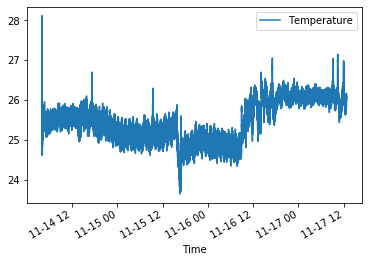

In [76]:
finaldata.plot(x='Time', y= 'Temperature')